In [1]:
import pandas as pd
import scipy.integrate as spi
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import matplotlib as mlb
import math
from scipy.stats import chisquare

In [3]:
nlines=10
pastel=cmap=plt.get_cmap('Pastel1')
pastel_colors = cmap(np.linspace(0,1,nlines))
set2=cmap=plt.get_cmap('Set2')
set2_colors = cmap(np.linspace(0,1,nlines))

In [10]:
from tempfile import TemporaryFile
measles_only_file = TemporaryFile()
measles_diar_file = TemporaryFile()

In [11]:
np.save(measles_only_file, measles_only)

In [16]:
pd.DataFrame(measles_only).to_csv("measles_only_file.csv")

In [17]:
pd.DataFrame(measles_diarrhoea).to_csv("measles_diar_file.csv")

In [12]:
np.save(measles_diar_file, measles_diarrhoea)

In [2]:
alive1911=pd.read_csv("alivein1911.csv")

In [5]:
alive1911

,Unnamed: 0,Name,Sex,Birth date,Mother's Name,Father's Name,Deathdate,Cause of Death,Age at Death,Birth Order,Mother's age at birth,Father's age at birth,Parents married,Ethnicity,Rotuman,Pac Is,Non Pac Is
0,57,Mere Rejieli,f,15/07/1911,kijiana faga,faktaufon akerio,31/12/1960,NaN,alive,2.0,29.0,35.0,11/15/1908,Rotuman/Rotuman,1.0,0.0,0.0
1,80,Taukave Etike Jione,m,15/05/1905,sofia,aisake varea,31/12/1960,NaN,?,1.0,21.0,30.0,7/15/1908,Pac Is/Rotuman,1.0,1.0,0.0
2,82,Memaofa Rusile,f,15/12/1908,sofia,aisake varea,31/12/1960,NaN,alive,3.0,25.0,35.0,7/15/1908,Pac Is/Rotuman,1.0,1.0,0.0
3,156,Litu,f,15/03/1909,pasepa raumanu,hesaia urvaru,31/12/1960,NaN,alive,1.0,25.0,31.0,3/15/1908,Rotuman/Rotuman,1.0,0.0,0.0
4,157,George Nakaora,m,15/11/1910,pasepa raumanu,hesaia urvaru,31/12/1960,NaN,alive,2.0,26.0,33.0,3/15/1908,Rotuman/Rotuman,1.0,0.0,0.0
5,162,Suakmasa Rusila,f,15/02/1905,semantafa,auuri taito kautaurafi,15/12/1927,tubercular gland,22,1.0,25.0,26.0,5/15/1904,Rotuman/Rotuman,1.0,0.0,0.0
6,163,Aisake,m,15/04/1907,semantafa,auuri taito kautaurafi,14/04/1911,"measles, diarrhoea",4,2.0,27.0,28.0,5/15/1904,Rotuman/Rotuman,1.0,0.0,0.0
7,164,Kijiana,f,15/04/1910,semantafa,auuri taito kautaurafi,26/04/1911,"measles, diarrhoea",1,3.0,30.0,31.0,5/15/1904,Rotuman/Rotuman,1.0,0.0,0.0
8,194,Terotuma makereta,f,15/06/1911,rejieli uramafaga,alfereti tevita,15/06/1939,cancer of uterus,28,1.0,18.0,20.0,10/15/1910,Rotuman/Rotuman,1.0,0.0,0.0
9,218,Tanu Vasea Rave,m,15/05/1906,tamalesi,erasito toutou,31/12/1960,NaN,alive,2.0,31.0,27.0,NaN,Rotuman/Rotuman,1.0,0.0,0.0


In [3]:
cause=pd.Series(alive1911['Cause of Death'])
measles1911=alive1911[cause.str.contains('measles')==True]

In [4]:
pd.unique(measles1911['Cause of Death'])

array(['measles, diarrhoea', 'measles', 'measles, diahrroea',
       'measles, debility', 'measles, ileo-colitis', 'measles, phthisis',
       'phthisis, measles', 'measles, diarrhoea,\x0bheart failure',
       'measles, tuberculosis', 'measles, convulsions',
       'measles, yaws, \x0bsore throat', 'measles, gastritis',
       'measles, pneumonia', 'measles, diarrhoea,\x0bpregnancy',
       'measles, diarrhoea, phthisis', 'measles, diarrhoea, ostitis',
       'measles, miscarriage', 'measles, phthisis, diarrhoea',
       'measles, diarrhoea,\x0bchildbirth',
       'measles, diarrhoea,\x0bmiscarriage'], dtype=object)

In [7]:
measles1911['Cause of Death'].values[1]=='measles, diarrhoea'

True

In [5]:
measles_tb_diar=np.array([])
for i in range(len(measles1911)):
    
    if measles1911['Cause of Death'].values[i]=='measles, phthisis, diarrhoea':
        measles_tb_diar=np.hstack((measles_tb_diar,measles1911['Deathdate'].values[i]))
    elif measles1911['Cause of Death'].values[i]== 'measles, diarrhoea, phthisis':
        measles_tb_diar=np.hstack((measles_tb_diar,measles1911['Deathdate'].values[i]))

In [6]:
measles_tb=np.array([])
for i in range(len(measles1911)):
    
    if measles1911['Cause of Death'].values[i]=='measles, phthisis':
        measles_tb=np.hstack((measles_tb,measles1911['Deathdate'].values[i]))
    elif measles1911['Cause of Death'].values[i]=='phthisis, measles':
        measles_tb=np.hstack((measles_tb,measles1911['Deathdate'].values[i]))
    elif measles1911['Cause of Death'].values[i]=='measles, tuberculosis':
        measles_tb=np.hstack((measles_tb,measles1911['Deathdate'].values[i]))
    

In [7]:
measles_only=np.array([])
for i in range(len(measles1911)):
    
    if measles1911['Cause of Death'].values[i]=='measles':
        measles_only=np.hstack((measles_only,measles1911['Deathdate'].values[i]))

In [6]:
len(measles_only)

56

In [8]:
measles_diarrhoea=np.array([])
for i in range(len(measles1911)):
    
    if measles1911['Cause of Death'].values[i]=='measles, diarrhoea':
        measles_diarrhoea=np.hstack((measles_diarrhoea,measles1911['Deathdate'].values[i]))
    
    elif measles1911['Cause of Death'].values[i]=='measles, diahrroea':
        measles_diarrhoea=np.hstack((measles_diarrhoea,measles1911['Deathdate'].values[i]))  
    elif measles1911['Cause of Death'].values[i]=='measles, ileo-colitis':
        measles_diarrhoea=np.hstack((measles_diarrhoea,measles1911['Deathdate'].values[i])) 
    elif measles1911['Cause of Death'].values[i]=='measles, diarrhoea,\x0bheart failure':
        measles_diarrhoea=np.hstack((measles_diarrhoea,measles1911['Deathdate'].values[i])) 
        
    elif measles1911['Cause of Death'].values[i]=='measles, diarrhoea,\x0bchildbirth':
        measles_diarrhoea=np.hstack((measles_diarrhoea,measles1911['Deathdate'].values[i])) 
        
    elif measles1911['Cause of Death'].values[i]== 'measles, diarrhoea,\x0bmiscarriage':
        measles_diarrhoea=np.hstack((measles_diarrhoea,measles1911['Deathdate'].values[i])) 
    
    elif measles1911['Cause of Death'].values[i]== 'measles, gastritis':
        measles_diarrhoea=np.hstack((measles_diarrhoea,measles1911['Deathdate'].values[i])) 
        

In [9]:
len(measles_diarrhoea)

251

In [12]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 18})
plt.hist(age_dist_tail,bins=4,color='c')
plt.xlabel('Age at Death')
plt.ylabel('')
#plt.title('Age distribution')
plt.show()

NameError: name 'age_dist_tail' is not defined

In [13]:
age_dist_tail=np.zeros(10)
j=0
for i in range(len(measles1911)):
    
    if datetime.strptime(measles1911['Deathdate'].values[i],'%d/%m/%Y')>datetime(1911, 7, 1, 0, 0):
        #print(measles1911.values[i])

        age_dist_tail[j]=measles1911['Age at Death'].values[i]
        j=j+1

In [34]:
deathmeasles=measles1911["Deathdate"].values

In [35]:
deathtime=np.zeros(len(measles1911))

In [36]:
deathmeasles

array(['14/04/1911', '26/04/1911', '14/04/1911', '25/04/1911',
       '15/04/1911', '10/04/1911', '21/04/1911', '01/05/1911',
       '06/04/1911', '01/04/1911', '26/04/1911', '21/05/1911',
       '27/03/1911', '17/04/1911', '11/05/1911', '21/04/1911',
       '26/03/1911', '04/05/1911', '29/03/1911', '03/04/1911',
       '27/03/1911', '04/04/1911', '13/04/1911', '29/04/1911',
       '07/05/1911', '10/03/1911', '06/07/1911', '14/04/1911',
       '01/04/1911', '06/05/1911', '06/04/1911', '09/04/1911',
       '07/03/1911', '15/04/1911', '27/04/1911', '08/05/1911',
       '31/03/1911', '11/03/1911', '20/03/1911', '22/04/1911',
       '12/04/1911', '11/05/1911', '22/04/1911', '02/04/1911',
       '20/04/1911', '13/04/1911', '25/06/1911', '30/03/1911',
       '22/04/1911', '13/04/1911', '07/05/1911', '10/05/1911',
       '10/04/1911', '04/04/1911', '15/09/1911', '23/07/1911',
       '15/11/1911', '12/06/1911', '31/08/1911', '22/06/1911',
       '29/07/1911', '25/06/1911', '15/08/1911', '29/07

In [37]:
deathmeasles=sorted(deathmeasles, key=lambda x: datetime.strptime(x, '%d/%m/%Y'))

In [38]:
deathmeasles

['26/02/1911',
 '04/03/1911',
 '07/03/1911',
 '08/03/1911',
 '10/03/1911',
 '10/03/1911',
 '11/03/1911',
 '12/03/1911',
 '13/03/1911',
 '13/03/1911',
 '14/03/1911',
 '16/03/1911',
 '16/03/1911',
 '16/03/1911',
 '18/03/1911',
 '19/03/1911',
 '19/03/1911',
 '20/03/1911',
 '20/03/1911',
 '20/03/1911',
 '20/03/1911',
 '21/03/1911',
 '22/03/1911',
 '22/03/1911',
 '22/03/1911',
 '22/03/1911',
 '23/03/1911',
 '23/03/1911',
 '24/03/1911',
 '24/03/1911',
 '25/03/1911',
 '25/03/1911',
 '26/03/1911',
 '26/03/1911',
 '26/03/1911',
 '26/03/1911',
 '26/03/1911',
 '27/03/1911',
 '27/03/1911',
 '27/03/1911',
 '27/03/1911',
 '29/03/1911',
 '29/03/1911',
 '29/03/1911',
 '29/03/1911',
 '30/03/1911',
 '31/03/1911',
 '31/03/1911',
 '31/03/1911',
 '01/04/1911',
 '01/04/1911',
 '01/04/1911',
 '01/04/1911',
 '01/04/1911',
 '01/04/1911',
 '02/04/1911',
 '02/04/1911',
 '02/04/1911',
 '02/04/1911',
 '02/04/1911',
 '02/04/1911',
 '02/04/1911',
 '03/04/1911',
 '04/04/1911',
 '04/04/1911',
 '04/04/1911',
 '04/04/19

In [8]:
len(pd.unique(deathmeasles))

92

In [39]:
daterange[0].date()

datetime.date(1911, 4, 14)

In [40]:
uniq_deathmeasles=pd.unique(deathmeasles)

In [41]:
daterange=pd.date_range(uniq_deathmeasles[0],uniq_deathmeasles[-1],freq='D')

In [42]:
values5=np.zeros(len(daterange))
deathtime5=np.zeros(len(daterange))
for i in range(len(daterange)):
    for j in range(len(measles_tb_diar)):
        if daterange[i]==datetime.strptime(measles_tb_diar[j],'%d/%m/%Y'):
            print(i)
            print(j)
            values5[i]=values5[i]+1
    deathtime5[i]=mlb.dates.date2num(daterange[i])

49
0
63
1


In [43]:
values4=np.zeros(len(daterange))
deathtime4=np.zeros(len(daterange))
for i in range(len(daterange)):
    for j in range(len(measles_tb)):
        if daterange[i]==datetime.strptime(measles_tb[j],'%d/%m/%Y'):
            print(i)
            print(j)
            values4[i]=values4[i]+1
    deathtime4[i]=mlb.dates.date2num(daterange[i])

12
6
46
7
54
8
57
9
65
10
89
11
147
0
153
3
153
5
170
4
186
2
228
12
262
1
264
13


In [46]:
values3=np.zeros(len(daterange))
deathtime3=np.zeros(len(daterange))
for i in range(len(daterange)):
    for j in range(len(measles_only)):
        if daterange[i]==datetime.strptime(measles_only[j],'%d/%m/%Y'):
            print(i)
            print(j)
            values3[i]=values3[i]+1
    deathtime3[i]=mlb.dates.date2num(daterange[i])

9
12
12
9
13
13
18
19
18
20
20
22
22
14
22
21
24
23
28
24
28
25
29
6
34
4
34
10
35
29
37
17
37
26
37
27
37
28
37
30
37
31
38
32
39
3
39
11
39
37
40
33
40
35
40
36
40
38
40
41
41
34
41
39
41
40
41
48
41
55
42
42
42
45
42
46
43
1
43
43
43
44
43
47
44
49
44
50
44
51
45
16
46
8
47
0
47
52
48
18
50
7
54
2
55
15
59
5
62
54
63
53


In [44]:
values2=np.zeros(len(daterange))
deathtime2=np.zeros(len(daterange))
for i in range(len(daterange)):
    for j in range(len(measles_diarrhoea)):
        if daterange[i]==datetime.strptime(measles_diarrhoea[j],'%d/%m/%Y'):
            print(i)
            print(j)
            values2[i]=values2[i]+1
    deathtime2[i]=mlb.dates.date2num(daterange[i])

0
40
6
41
10
42
14
44
15
43
15
45
16
46
18
48
21
50
21
51
22
47
22
53
23
49
24
58
25
52
25
54
26
57
26
61
27
59
27
60
28
8
28
55
28
56
29
12
29
62
29
63
31
10
31
64
31
65
31
66
32
29
33
22
33
67
33
68
34
71
34
73
34
74
34
78
35
25
35
69
35
70
35
72
35
75
35
77
36
11
37
13
37
76
42
18
43
34
43
86
44
87
45
81
45
83
45
84
45
85
46
27
46
31
46
82
46
88
46
89
46
91
46
94
46
100
46
112
47
0
47
16
47
79
47
80
47
92
47
105
47
107
47
108
47
109
47
110
48
3
48
19
48
90
48
95
48
102
48
106
48
113
49
97
49
101
49
103
49
104
49
111
49
116
49
117
49
250
50
93
50
96
50
98
50
99
50
115
50
118
50
120
51
114
51
121
51
125
51
126
52
119
52
122
52
123
52
139
52
150
53
26
53
124
53
127
53
128
53
132
53
133
53
137
53
138
54
7
54
131
54
134
54
135
54
140
54
141
54
142
54
143
54
146
54
149
54
166
55
24
55
30
55
130
55
147
55
151
55
155
55
158
56
129
56
144
56
154
57
136
57
145
57
148
57
152
57
153
57
156
57
157
57
159
57
160
57
163
57
175
58
2
58
164
58
168
58
169
58
174
59
1
59
161
59
162
59
167
60
20
60
165

In [26]:
values2

array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,
         0.,   0.,   0.,   1.,   2.,   1.,   0.,   1.,   0.,   0.,   2.,
         2.,   1.,   1.,   2.,   2.,   2.,   3.,   3.,   0.,   4.,   1.,
         3.,   4.,   6.,   1.,   2.,   0.,   0.,   0.,   0.,   1.,   2.,
         1.,   4.,   9.,  10.,   7.,   8.,   7.,   4.,   5.,   8.,  11.,
         7.,   3.,  11.,   5.,   4.,   8.,   2.,   3.,   8.,   6.,   3.,
         2.,   6.,   8.,   5.,   7.,   4.,   5.,   5.,   2.,   1.,   0.,
         1.,   1.,   1.,   0.,   2.,   1.,   2.,   3.,   1.,   1.,   0.,
         2.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
         0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [47]:
values=np.zeros(len(daterange))
deathtime=np.zeros(len(daterange))
for i in range(len(daterange)):
    for j in range(len(deathmeasles)):
        if daterange[i]==datetime.strptime(deathmeasles[j],'%d/%m/%Y'):
            print(i)
            print(j)
            values[i]=values[i]+1
    deathtime[i]=mlb.dates.date2num(daterange[i])
arrivalmeasles=mlb.dates.date2num(datetime.strptime('28/01/1911','%d/%m/%Y'))

0
0
6
1
9
2
10
3
12
4
12
5
13
6
14
7
15
8
15
9
16
10
18
11
18
12
18
13
20
14
21
15
21
16
22
17
22
18
22
19
22
20
23
21
24
22
24
23
24
24
24
25
25
26
25
27
26
28
26
29
27
30
27
31
28
32
28
33
28
34
28
35
28
36
29
37
29
38
29
39
29
40
31
41
31
42
31
43
31
44
32
45
33
46
33
47
33
48
34
49
34
50
34
51
34
52
34
53
34
54
35
55
35
56
35
57
35
58
35
59
35
60
35
61
36
62
37
63
37
64
37
65
37
66
37
67
37
68
37
69
37
70
38
71
39
72
39
73
39
74
40
75
40
76
40
77
40
78
40
79
41
80
41
81
41
82
41
83
41
84
42
85
42
86
42
87
42
88
43
89
43
90
43
91
43
92
43
93
43
94
44
95
44
96
44
97
44
98
45
99
45
100
45
101
45
102
45
103
46
104
46
105
46
106
46
107
46
108
46
109
46
110
46
111
46
112
46
113
46
114
47
115
47
116
47
117
47
118
47
119
47
120
47
121
47
122
47
123
47
124
47
125
47
126
47
127
48
128
48
129
48
130
48
131
48
132
48
133
48
134
48
135
48
136
49
137
49
138
49
139
49
140
49
141
49
142
49
143
49
144
49
145
50
146
50
147
50
148
50
149
50
150
50
151
50
152
50
153
51
154
51
155
51
156
51
157
52
158


In [96]:
values

array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,
         0.,   2.,   1.,   1.,   2.,   1.,   0.,   3.,   0.,   1.,   2.,
         4.,   1.,   4.,   2.,   2.,   2.,   5.,   4.,   0.,   4.,   1.,
         3.,   6.,   7.,   1.,   8.,   1.,   3.,   5.,   5.,   4.,   6.,
         4.,   5.,  11.,  13.,   9.,   9.,   8.,   4.,   5.,   8.,  13.,
         8.,   3.,  12.,   5.,   5.,  10.,   2.,   4.,  11.,   6.,   4.,
         2.,   6.,   8.,   5.,   7.,   4.,   6.,   5.,   2.,   1.,   0.,
         1.,   1.,   1.,   0.,   2.,   1.,   2.,   3.,   1.,   1.,   0.,
         2.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
         0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   2.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   1.,   0.,   0.,   

In [83]:
type(daterange)

pandas.core.indexes.datetimes.DatetimeIndex

In [18]:
# deathtime=np.zeros(len(pd.unique(deathmeasles)))
# arrivalmeasles=mlb.dates.date2num(datetime.strptime('28/01/1911','%d/%m/%Y'))
# for i in range(len(pd.unique(deathmeasles))):
#     deathtime[i]=mlb.dates.date2num(datetime.strptime(uniq_deathmeasles[i],'%d/%m/%Y'))
    

In [161]:
def coinf_model(INP,t):  

    #Y=np.zeros((8))
    Y=np.zeros((10))
    V = INP    
    #SS
    Y[0]=-beta[0]*V[0]*(V[1]+V[3]+V[5]+V[7])-beta[1]*V[0]*(V[2]+V[3])+gamma0*V[1]
    
 
    #IS 0 pathogen
    Y[1]=beta[0]*V[0]*(V[1]+V[3]+V[5]+V[7])-beta[1]*V[1]*(V[2]+V[3])-gamma0*V[1]
    
    
    #SI 1 measles
    Y[2]=beta[1]*V[0]*(V[2]+V[3])-beta[0]*V[2]*(V[1]+V[3]+V[5]+V[7])-omega[0]*V[2]+gamma0*V[3]-mu[0]*V[2]
    
    
    #II 0 and 1 measles and pathogen
    Y[3]=beta[0]*V[2]*(V[1]+V[3]+V[5]+V[7])+beta[1]*V[1]*(V[2]+V[3])-gamma0*V[3]-omega[1]*V[3]-mu[1]*V[3]
    
    

    #SX immunosuppressed
    Y[4]=omega[0]*V[2]-gamma1*V[4]+gamma0*V[5]-beta[0]*V[4]*(V[1]+V[3]+V[5]+V[7])
    

    
    #IX
    Y[5]=omega[1]*V[3]+beta[0]*V[4]*(V[1]+V[3]+V[5]+V[7])-gamma1*V[5]-mu[2]*V[5]-gamma0*V[5]
    

    #SR
    Y[6]=gamma1*V[4]+gamma0*V[7]-beta[0]*V[6]*(V[1]+V[3]+V[5]+V[7])
    
   
    
    #IR
    Y[7]=beta[0]*V[6]*(V[1]+V[3]+V[5]+V[7])+gamma1*V[5]-gamma0*V[7]
    
    Y[8]=mu[0]*V[2]
    Y[9]=mu[1]*V[3]+mu[2]*V[5]

  
    return Y   # For odeint



In [255]:
N=1e3
beta=np.array([0.35/N,0.4/N])
#c=1/100
c=1/2
mu=np.array([c/24,c/24,c/50])

omega=np.array([1/24,1/24])
gamma0=1/10
gamma1=1/50


IS0=650
SI0=1
II0=0
SX0=0
IX0=0
SR0=0
IR0=0
SS0=N-IS0-SI0
INPUT=(SS0,IS0,SI0,II0,SX0,IX0,SR0,IR0,0,0)
TS=1.0
ND=200.0
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(coinf_model,INPUT,t_range)


In [125]:
# plt.figure(figsize=(15,10))
# plt.rcParams.update({'font.size': 24})
# # #plt.plot(RES[:,0],label="SS")
# # #plt.plot(RES[:,1],label="IS-mystery pathogen alone")
# # plt.plot(RES[:,2],label=("SI-only measles"))

# # plt.plot(RES[:,3],label=("II"))
# # #plt.plot(RES[:,4],label=("SX"))
# # plt.plot(RES[:,5],label=("IX-immuno suppressed infected "))
# # #plt.plot(RES[:,6],label=("SR"))
# # #plt.plot(RES[:,7],label=("IR"))
# plt.plot(RES[1:100,8]-RES[0:99,8],label=("SI-only measles"))
# plt.plot(RES[1:100,9]-RES[0:99,9],label=("coinfected"))
# plt.xlabel('Days')
# plt.ylabel('Infected')
# plt.legend()
# plt.show()

In [256]:
a=np.zeros(12)
only_measles=np.hstack((a,RES[1:150,8]-RES[0:149,8]))
both_co=np.hstack((a,RES[1:150,9]-RES[0:149,9]))

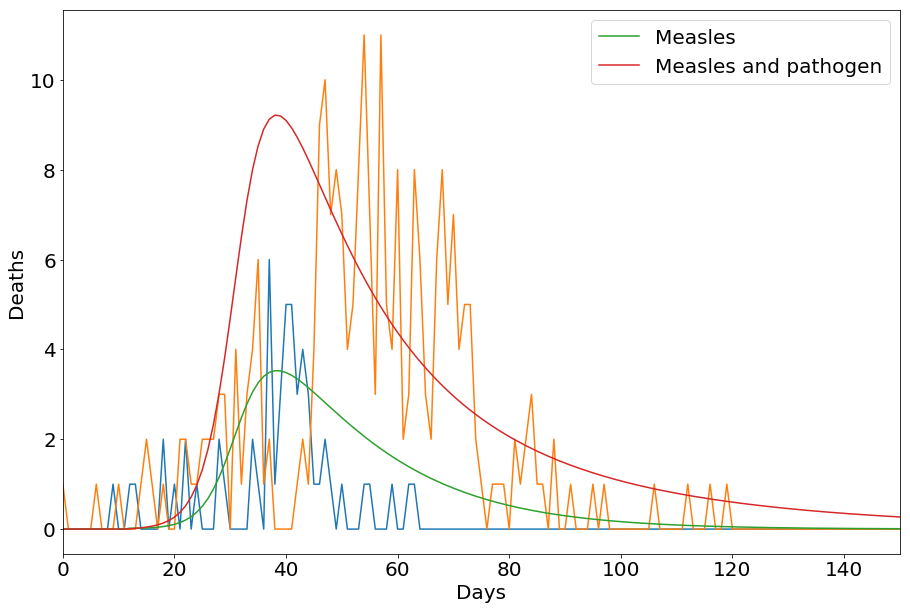

In [257]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 20})
plt.plot(values3)
plt.plot(values2)
# plt.plot(RES[:,1],label=("SI-only measles"))
# plt.plot(RES[:,6],label=("SI-only measles"))

# plt.plot(RES[:,2],label=("SI-only measles"))
# plt.plot(RES[:,5],label=("IX-immuno suppressed infected "))
plt.plot(only_measles,label="Measles")
plt.plot(both_co,label="Measles and pathogen")
#plt.plot(RES[1:150,8]-RES[0:149,8],label=("SI-only measles"))
#plt.plot(RES[1:150,9]-RES[0:149,9],label=("coinfected"))
#plt.plot(values4)
#plt.plot(values5)
plt.legend()
plt.ylabel("Deaths")
plt.xlim((0,150))
plt.xlabel('Days')
plt.show()

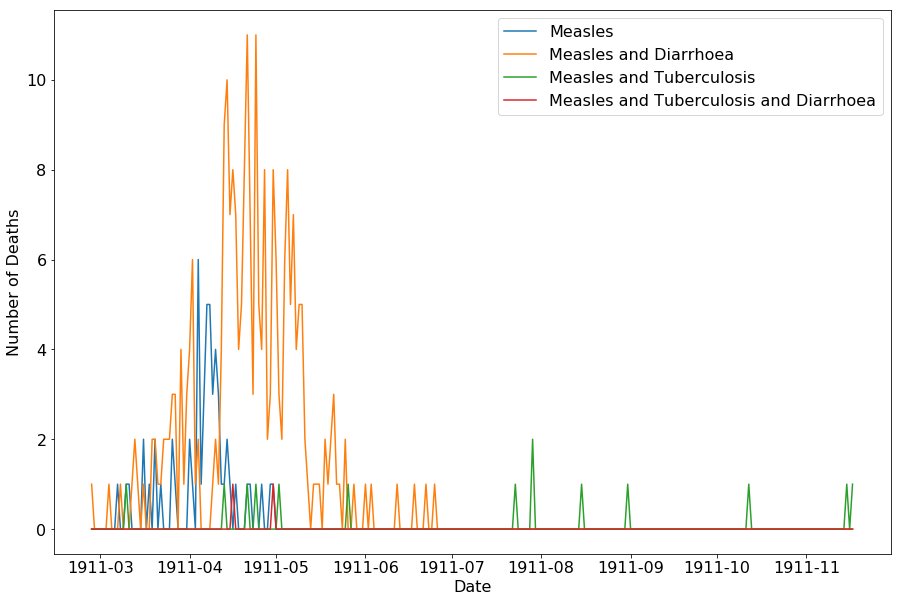

In [48]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 16})
plt.plot_date(daterange,values3,'-',label="Measles")
plt.plot_date(daterange,values2,'-',label="Measles and Diarrhoea")
plt.plot_date(daterange,values4,'-',label="Measles and Tuberculosis")
plt.plot_date(daterange,values5,'-',label="Measles and Tuberculosis and Diarrhoea")
plt.legend()
plt.rcParams.update({'font.size': 30})
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.show()

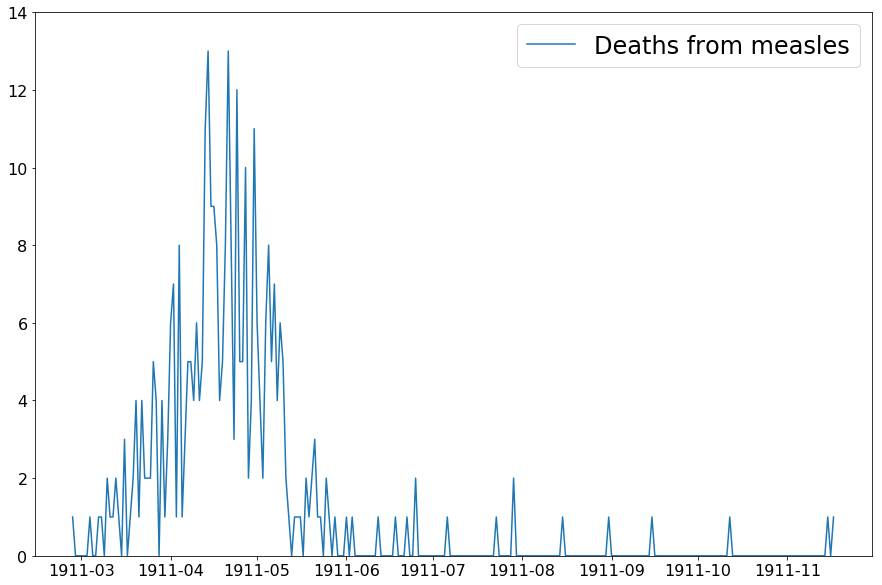

In [12]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 16})
plt.plot_date(deathtime,values,'-',label="Deaths from measles")

#plt.plot_date(arrivalmeasles,1,'o',)
plt.ylim((0,14))

plt.rcParams.update({'font.size': 24})
plt.legend()
plt.show()

In [22]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((5))
	V = INP    
	Y[0] = - beta * V[0] * V[2] 
	Y[1] = beta * V[0] * V[2] - sigma * V[1]
	Y[2] = sigma * V[1] - gamma * V[2] -mu_d*V[2]
	Y[3]=mu_d*V[2]
	Y[4]=gamma*V[2]
	return Y   # For odeint


In [37]:
beta_range=100
beta_val=np.linspace(0.0005,2.0,beta_range)
RES=np.zeros((2*365+1,5,beta_range))
for i in range(beta_range):
    beta=beta_val[i]

    gamma=1/10.0
    sigma=1/12.0

    N0=2618.0
    mu_d=334/26180
    #mu_d=0
    TS=1.0
    S0=N0-1
    E0=1
    I0=0
    D0=0
    ND=2*365.0
    INPUT = (S0, E0, I0,D0,0)





    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES[:,:,i] = spi.odeint(diff_eqs,INPUT,t_range)


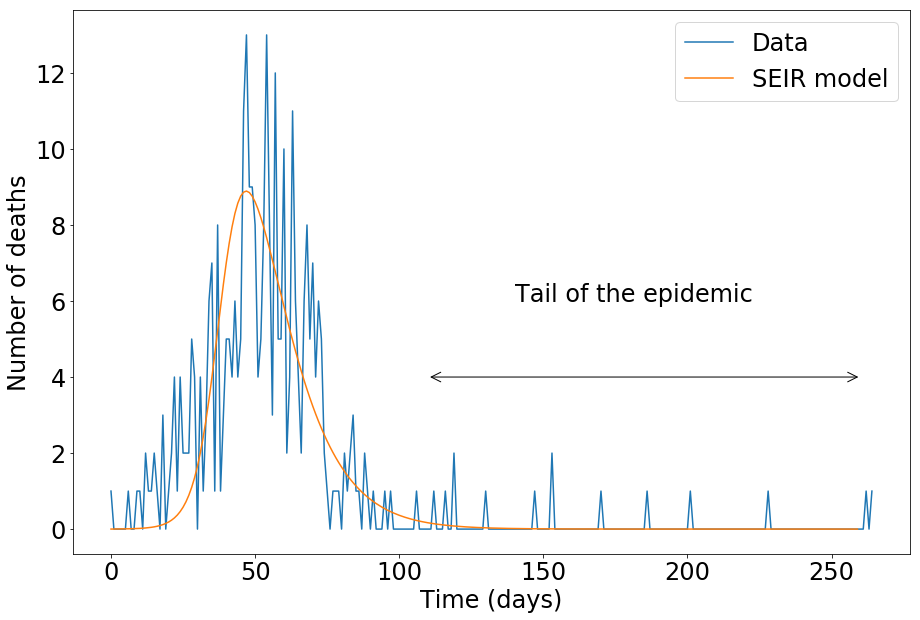

In [58]:
plt.figure(figsize=(15,10))
#plt.plot(RES[0:100,2,0],label="beta=small")
#plt.plot(RES[0:100,-1,0])
plt.plot(values, label='Data')
delay=np.zeros(1)
RES_delay=np.hstack((delay,RES[1:261,3,0]-RES[0:260,3,0]))
plt.plot(RES[1:261,3,0]-RES[0:260,3,0], label='SEIR model')
         #label='$R_0$ {0:.3f}'.format(beta_val[0]/gamma))
#plt.plot(RES_delay,label='$R_0$ {0:.3f}'.format(beta_val[5]/gamma))
#plt.plot(RES[1:261,3,5]-RES[0:260,3,5],label='$R_0$ {0:.3f}'.format(beta_val[5]/gamma))
#plt.plot(RES[1:201,3,10]-RES[0:200,3,10],label='$R_0$ {0:.1f}'.format(beta_val[1]/gamma))
#plt.plot(RES[1:201,3,10]-RES[0:200,3,10],label='$R_0$ {0:.1f}'.format(beta_val[5]/gamma))
#plt.plot(RES[1:101,3,90]-RES[0:100,3,90],label='beta {0:.1f}'.format(beta_val[90]/gamma))
#plt.plot(RES[0:100,3,99])
plt.annotate("", xy=(110, 4), xycoords='data',
             xytext=(260, 4), textcoords='data',
             arrowprops=dict(arrowstyle="<->", connectionstyle="arc3"))
plt.text(140,6,"Tail of the epidemic")
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Number of deaths')
plt.show()

In [45]:
sum(RES_delay)

296.20732815159568

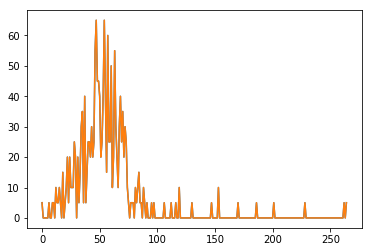

In [21]:
plt.plot(values*5)
plt.show()

In [23]:
sum(values*5)/2616

0.6383792048929664

In [26]:
len(alive1911)

2618

In [10]:
plt.figure(figsize=(15,10))
plt.plot(measles_diarrhoea)

ValueError: could not convert string to float: '14/04/1911'

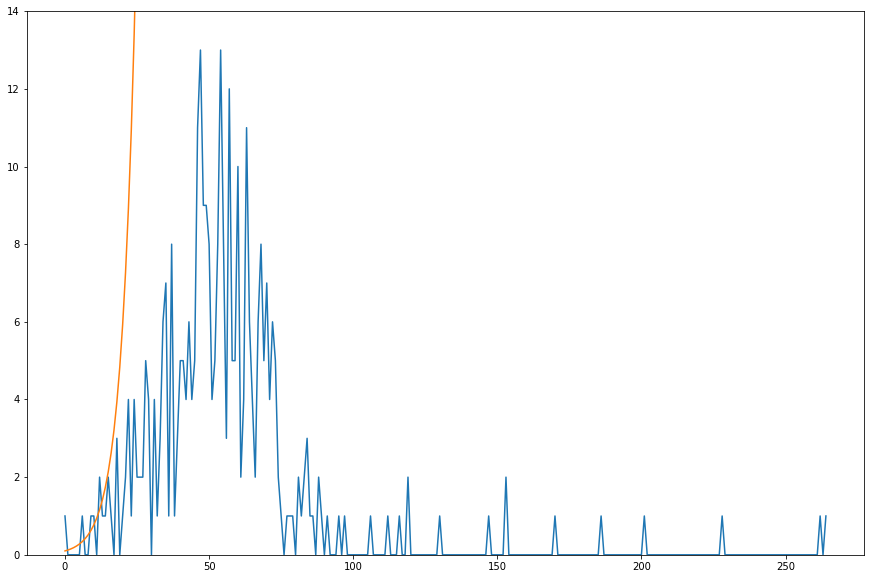

In [122]:
plt.figure(figsize=(15,10))
plt.plot(values)
plt.plot((1/10)*np.exp(np.linspace(0,10)))
plt.ylim((0,14))
plt.show()

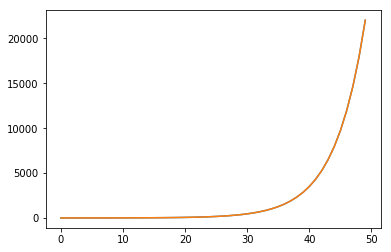

In [106]:
plt.plot(np.exp(np.linspace(0,10)))
plt.show()

In [25]:
pd.unique(alive1911['Ethnicity'])

array(['Rotuman/Rotuman', 'Pac Is/Rotuman', 'Rotuman/European',
       'Rotuman/Rot-European', 'Rot-Euro/Rot-Euro', 'Rotuman/Rot-Pac Is',
       'Rot-Pac Is/Rotuman', 'Rot-Euro/Rotuman', 'Rotuman-Pac Is/Pac Is',
       'Rotuman/Pac Is', 'Rot-Asian/Rot-Euro', 'Pac Is/Rotuman-Pac Is',
       'Pac Is/Pac Is', 'European/European', 'Other/Other',
       'No Info/Pac Is', 'Rotuman-Pac Is/Rotuman', 'Rotuman-Euro/European',
       'Pac Is/No Info', 'Part-Euro/European', 'Rotuman/Rot-Euro',
       'Pac Is/European'], dtype=object)

In [22]:
len(alive1911[alive1911['Ethnicity']=='Rotuman/Rot-Euro'])

5

In [105]:
alive1911[alive1911['Ethnicity']=='Part-Euro/European']

,Unnamed: 0,Name,Sex,Birth date,Mother's Name,Father's Name,Deathdate,Cause of Death,Age at Death,Birth Order,Mother's age at birth,Father's age at birth,Parents married,Ethnicity,Rotuman,Pac Is,Non Pac Is
2257,9892,Irene Dodo,f,01/01/1896,lydia ruve,E. Hawhesley,15/02/1931,toxemia (pregnancy),35,NaN,NaN,NaN,NaN,Part-Euro/European,0.0,0.0,1.0


In [25]:
len(alive1911[alive1911['Ethnicity']=='Pac Is/European'])

2

In [109]:
count=0
for i in range(len(alive1911)):
    if alive1911['Non Pac Is'].values[i]==1:
        if alive1911['Rotuman'].values[i]==1 or alive1911['Pac Is'].values[i]==1:
            print(alive1911['Sex'].values[i])
            count=count+1

f
m
f
m
f
f
f
f
f
m
f
m
m
f
m
m
m
m
f
f
f
m
f
f
m
m
f
m
m
m
f
f
f
m
f
m
f
f
m
m
m
f
m
f
m
m
m
m
m
m
m
m
m
f
m
f
f
f
m
m
m
f
m
f
m
m
m
f
m
f
f
f
f
f
m
m
m
m
m


In [103]:
count

89

In [99]:
count=0
for i in range(len(alive1911)):
    if alive1911['Pac Is'].values[i]==0 and alive1911['Rotuman'].values[i]==0 and alive1911['Non Pac Is'].values[i]==1:
        print(alive1911['Ethnicity'].values[i])
        count=count+1

European/European
European/European
European/European
European/European
European/European
European/European
European/European
European/European
European/European
European/European
European/European
European/European
Part-Euro/European
European/European
European/European
European/European
European/European


In [97]:
pd.unique(alive1911['Sex'])

array(['f', 'm', 'm ', 'M', nan, '?', 'n'], dtype=object)

In [6]:
count=0
for i in range(len(alive1911)):
    if alive1911['Sex'].values[i]!='f' and alive1911['Sex'].values[i]!='m ' and alive1911['Sex'].values[i]!='M' and alive1911['Sex'].values[i]!='m':
        print(i)
        #count=count+1

2474
2479
2480
2529


In [15]:
for i in range(len(alive1911)):
    if alive1911['Sex'].values[i]=='f' and age[i]<6 and alive1911['Non Pac Is'].values[i]==1:
        print(alive1911.values[i])

[643 'Ofa ' 'f' '15/02/1906' 'penerope muamasau' 'francis s. whitcombe'
 '15/01/1958' 'undiagnosed' '51' 1.0 29.0 26.0 '09/15/1902'
 'Rotuman/European' 1.0 0.0 1.0]
[684 'Mere Garrett' 'f' '15/02/1906' 'unaisi amei' 'george missen'
 '31/12/1960' nan 'alive' 2.0 29.0 25.0 '01/15/1896' 'Rotuman/Rot-European'
 1.0 0.0 1.0]
[688 'Pasimata ' 'f' '15/04/1906' 'unaisi amei' 'george missen'
 '15/12/1957' 'undiagnosed' '51' 6.0 29.0 33.0 '01/15/1896'
 'Rotuman/Rot-European' 1.0 0.0 1.0]
[1033 'Sarote Hae' 'f' '15/09/1910' 'maressa vikatoria' 'lauritz olsen'
 '31/12/1960' nan 'alive' 6.0 nan 45.0 nan 'Rotuman/European' 1.0 0.0 1.0]
[1589 'Motofaga ' 'f' '15/09/1907' 'aitu tausia' 'firipo' '31/12/1960' nan
 'alive' 2.0 26.0 27.0 nan 'Rotuman/Rot-European' 1.0 0.0 1.0]
[1591 'Irava ' 'f' '15/12/1910' 'aitu tausia' 'firipo' '19/03/1912'
 'diarrhoea' '1.2' 4.0 30.0 30.0 nan 'Rotuman/Rot-European' 1.0 0.0 1.0]
[4316 'Maria Kamea' 'f' '15/12/1909' 'amai seferosa' 'konau kamarieli'
 '15/12/1931' 'tuber

In [17]:
len(alive1911[alive1911['Ethnicity']=='Rotuman/Rotuman'])

2351

In [78]:
alive1911.values[2474]

array([10191, 'Kerera Vataiki', nan, '15/02/1910', 'nanise surava',
       'josefa lurukofa', '31/12/1960', nan, 'alive', nan, nan, nan, nan,
       'Rotuman/Rotuman', 1.0, 0.0, 0.0], dtype=object)

In [79]:
alive1911.values[2479]

array([10196, 'Tipo', '?', '01/01/1880', nan, nan, '31/12/1960', nan,
       'alive', nan, nan, nan, nan, 'Rotuman/Rotuman', 1.0, 0.0, 0.0], dtype=object)

In [80]:
alive1911.values[2480]

array([10198, 'Jioje Malau', 'n', '01/01/1884', nan, nan, '31/12/1960',
       nan, 'alive', nan, nan, nan, nan, 'Pac Is/Pac Is', 0.0, 1.0, 0.0], dtype=object)

In [81]:
alive1911.values[2529]

array([10329, 'Sarome Pasimata', nan, '01/01/1902', 'jemaima marseu',
       'mekatoa', '31/12/1960', nan, 'alive', nan, nan, nan, nan,
       'Rotuman/Rotuman', 1.0, 0.0, 0.0], dtype=object)

In [115]:
count

455

In [128]:
478+2077

2555

In [138]:
len(age)

2618

In [9]:
count=0
age=np.array([])
for i in range(len(alive1911)):
    age=np.append(age,1911-float(alive1911_age[i][6:]))
#     print(age)
#     if age>6:
#         count=count+1


In [140]:
count_0=0
count_1=0
count_2=0
count_3=0
count_4=0

for i in range(len(alive1911)):
    if age[i]<6:
        count_0=count_0+1
    elif age[i]>=6 and age[i]<=15:
        count_1=count_1+1
    elif age[i]>=16 and age[i]<=35:
        count_2=count_2+1
    elif age[i]>=36 and age[i]<=55:
        count_3=count_3+1
    elif age[i]>55:
        count_4=count_4+1
    
    else:
        print(i)

In [145]:
count_3

488

In [132]:
len(age)

2618

In [58]:
len(alive1911['Sex'])-1292-1322

4

In [42]:
len(alive1911['Ethnicity'])

2618

In [41]:
alive1911

,Unnamed: 0,Name,Sex,Birth date,Mother's Name,Father's Name,Deathdate,Cause of Death,Age at Death,Birth Order,Mother's age at birth,Father's age at birth,Parents married,Ethnicity,Rotuman,Pac Is,Non Pac Is
0,57,Mere Rejieli,f,15/07/1911,kijiana faga,faktaufon akerio,31/12/1960,NaN,alive,2.0,29.0,35.0,11/15/1908,Rotuman/Rotuman,1.0,0.0,0.0
1,80,Taukave Etike Jione,m,15/05/1905,sofia,aisake varea,31/12/1960,NaN,?,1.0,21.0,30.0,7/15/1908,Pac Is/Rotuman,1.0,1.0,0.0
2,82,Memaofa Rusile,f,15/12/1908,sofia,aisake varea,31/12/1960,NaN,alive,3.0,25.0,35.0,7/15/1908,Pac Is/Rotuman,1.0,1.0,0.0
3,156,Litu,f,15/03/1909,pasepa raumanu,hesaia urvaru,31/12/1960,NaN,alive,1.0,25.0,31.0,3/15/1908,Rotuman/Rotuman,1.0,0.0,0.0
4,157,George Nakaora,m,15/11/1910,pasepa raumanu,hesaia urvaru,31/12/1960,NaN,alive,2.0,26.0,33.0,3/15/1908,Rotuman/Rotuman,1.0,0.0,0.0
5,162,Suakmasa Rusila,f,15/02/1905,semantafa,auuri taito kautaurafi,15/12/1927,tubercular gland,22,1.0,25.0,26.0,5/15/1904,Rotuman/Rotuman,1.0,0.0,0.0
6,163,Aisake,m,15/04/1907,semantafa,auuri taito kautaurafi,14/04/1911,"measles, diarrhoea",4,2.0,27.0,28.0,5/15/1904,Rotuman/Rotuman,1.0,0.0,0.0
7,164,Kijiana,f,15/04/1910,semantafa,auuri taito kautaurafi,26/04/1911,"measles, diarrhoea",1,3.0,30.0,31.0,5/15/1904,Rotuman/Rotuman,1.0,0.0,0.0
8,194,Terotuma makereta,f,15/06/1911,rejieli uramafaga,alfereti tevita,15/06/1939,cancer of uterus,28,1.0,18.0,20.0,10/15/1910,Rotuman/Rotuman,1.0,0.0,0.0
9,218,Tanu Vasea Rave,m,15/05/1906,tamalesi,erasito toutou,31/12/1960,NaN,alive,2.0,31.0,27.0,NaN,Rotuman/Rotuman,1.0,0.0,0.0


In [13]:
alive1911_age=alive1911['Birth date'].values

In [14]:
age_dist_rot=np.array([])
age_dist_partpacis=np.array([])
age_dist_parteuro=np.array([])
age_dist_euro=np.array([])
age_dist_pacis=np.array([])
age_dist_other=np.array([])


for i in range(len(alive1911)):
    
    if alive1911['Ethnicity'].values[i]=='Rotuman/Rotuman':
        age_dist_rot=np.append(age_dist_rot,(1911-float(alive1911_age[i][6:])))
        
    elif alive1911['Pac Is'].values[i]==1 and alive1911['Non Pac Is'].values[i]==0 and alive1911['Rotuman'].values[i]==0:
        age_dist_pacis=np.append(age_dist_pacis,(1911-float(alive1911_age[i][6:]))) 
        
    elif alive1911['Pac Is'].values[i]==1:
        age_dist_partpacis=np.append(age_dist_partpacis,(1911-float(alive1911_age[i][6:])))
        
    elif alive1911['Non Pac Is'].values[i]==1 and alive1911['Rotuman'].values[i]==0 and alive1911['Pac Is'].values[i]==0:
        age_dist_euro=np.append(age_dist_euro,(1911-float(alive1911_age[i][6:]))) 
        
    elif alive1911['Non Pac Is'].values[i]==1:
        age_dist_parteuro=np.append(age_dist_parteuro,(1911-float(alive1911_age[i][6:]))) 
    
    else:
        age_dist_other=np.append(age_dist_other,(1911-float(alive1911_age[i][6:])))

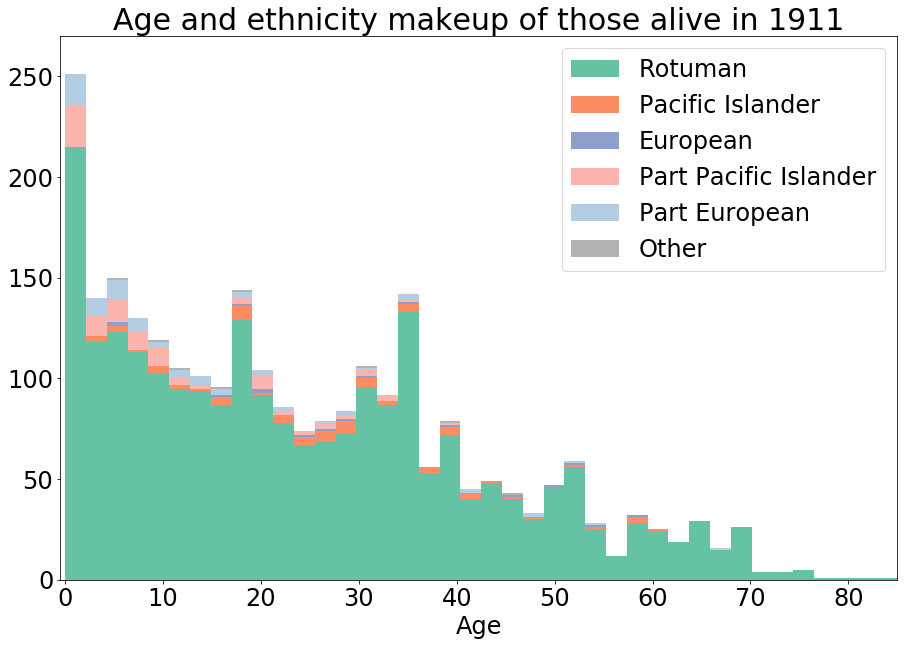

In [15]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 24})
plt.hist([age_dist_rot,age_dist_pacis,age_dist_euro,age_dist_partpacis,age_dist_parteuro,age_dist_other],color=[set2_colors[0],set2_colors[2],set2_colors[3],pastel_colors[0],pastel_colors[1],set2_colors[9]],bins=40,stacked=True,label=["Rotuman","Pacific Islander","European","Part Pacific Islander","Part European","Other"])

plt.ylim((0,270))
plt.xlim((-0.5,85))
plt.legend()
plt.xlabel("Age")
plt.title("Age and ethnicity makeup of those alive in 1911",fontsize=30)
#"Pacific Islander","Asian/European","Other"])
plt.show()

In [21]:
hist1911,a,b=plt.hist([age_dist_rot,age_dist_pacis,age_dist_euro,age_dist_partpacis,age_dist_parteuro,age_dist_other],color=[set2_colors[0],set2_colors[2],set2_colors[3],pastel_colors[0],pastel_colors[1],set2_colors[9]],bins=40,label=["Pure Rotuman","Pacific Islander","European","Part Pacific Islander","Part European","Other"])


In [22]:
hist1911

[array([ 215.,  118.,  123.,  113.,  102.,   95.,   94.,   87.,  129.,
          92.,   78.,   67.,   69.,   73.,   96.,   87.,  133.,   53.,
          72.,   40.,   48.,   40.,   30.,   46.,   56.,   25.,   12.,
          28.,   24.,   19.,   29.,   15.,   26.,    4.,    4.,    5.,
           1.,    1.,    1.,    1.]),
 array([ 0.,  3.,  3.,  1.,  4.,  2.,  1.,  4.,  7.,  1.,  4.,  4.,  5.,
         6.,  4.,  2.,  4.,  3.,  4.,  3.,  1.,  1.,  1.,  0.,  1.,  1.,
         0.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,  1.,  1.,
         1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 21.,  10.,  11.,   9.,   9.,   3.,   2.,   0.,   3.,   6.,   2.,
          2.,   3.,   2.,   3.,   3.,   1.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
    

In [31]:
nonrot1911=sum(hist1911[1:6])

In [36]:
nonrot1911

array([ 36.,  22.,  27.,  17.,  17.,  10.,   7.,   9.,  15.,  12.,   8.,
         7.,  10.,  11.,  10.,   5.,   9.,   3.,   7.,   5.,   1.,   3.,
         3.,   1.,   3.,   3.,   0.,   4.,   1.,   0.,   0.,   1.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.])

In [46]:
f_exp=(48/251)*np.array([215,236-215,251-236])

In [16]:
measles1911_age=measles1911['Age at Death'].values
# age_dist_meas=measles1911_age
# for i in range(len(measles1911)):
#     age_dist_meas[i]=float(measles1911_age[i])

In [37]:
measles1911

,Unnamed: 0,Name,Sex,Birth date,Mother's Name,Father's Name,Deathdate,Cause of Death,Age at Death,Birth Order,Mother's age at birth,Father's age at birth,Parents married,Ethnicity,Rotuman,Pac Is,Non Pac Is
6,163,Aisake,m,15/04/1907,semantafa,auuri taito kautaurafi,14/04/1911,"measles, diarrhoea",4,2.0,27.0,28.0,5/15/1904,Rotuman/Rotuman,1.0,0.0,0.0
7,164,Kijiana,f,15/04/1910,semantafa,auuri taito kautaurafi,26/04/1911,"measles, diarrhoea",1,3.0,30.0,31.0,5/15/1904,Rotuman/Rotuman,1.0,0.0,0.0
12,306,Marsoana,f,15/03/1903,rupe mere,riamkau,14/04/1911,measles,8,1.0,16.0,18.0,NaN,Rotuman/Rotuman,1.0,0.0,0.0
14,310,Lavenia Tausia,f,15/07/1910,rupe mere,riamkau,25/04/1911,"measles, diarrhoea",0.8,5.0,23.0,26.0,NaN,Rotuman/Rotuman,1.0,0.0,0.0
31,776,Mokitau,m,15/04/1907,fanjese matelita,atalifo terotuma,15/04/1911,"measles, diarrhoea",4,3.0,26.0,25.0,NaN,Rotuman/Rotuman,1.0,0.0,0.0
50,1186,Vilsoni,m,15/10/1906,ana turuaf hoerder,kuru uasele,10/04/1911,measles,4,2.0,20.0,21.0,04/15/1903,Rot-Euro/Rot-Euro,1.0,0.0,1.0
56,1206,Emose,m,15/05/1910,tausia isapeti,turapu aptinko,21/04/1911,measles,0.9,1.0,18.0,21.0,NaN,Rotuman/Rotuman,1.0,0.0,0.0
57,1315,Tua,m,15/04/1909,akanisi feskatoa,vataiki,01/05/1911,"measles, diarrhoea",2.1,1.0,17.0,21.0,2/15/1908,Rotuman/Rotuman,1.0,0.0,0.0
58,1588,Tua,f,15/07/1904,aitu tausia,firipo,06/04/1911,measles,6,1.0,23.0,24.0,NaN,Rotuman/Rot-European,1.0,0.0,1.0
77,3772,Lustika,f,15/01/1910,faga eleni,arosio ravak,01/04/1911,measles,1.2,2.0,18.0,30.0,2/15/1907,Rotuman/Rotuman,1.0,0.0,0.0


In [17]:
age_meas_rot=np.array([])
age_meas_pacis=np.array([])
age_meas_partpacis=np.array([])
age_meas_euro=np.array([])
age_meas_parteuro=np.array([])
age_meas_other=np.array([])


for i in range(len(measles1911)):
    if measles1911['Ethnicity'].values[i]=='Rotuman/Rotuman':
        age_meas_rot=np.append(age_meas_rot,float(measles1911_age[i]))
        
    elif measles1911['Pac Is'].values[i]==1 and measles1911['Non Pac Is'].values[i]==0 and measles1911['Rotuman'].values[i]==0:
        age_meas_pacis=np.append(age_meas_pacis,float(measles1911_age[i]) )
        
    elif measles1911['Pac Is'].values[i]==1:
        age_meas_partpacis=np.append(age_meas_partpacis,float(measles1911_age[i]))
        
    elif measles1911['Non Pac Is'].values[i]==1 and measles1911['Rotuman'].values[i]==0 and measles1911['Pac Is'].values[i]==0:
        age_meas_euro=np.append(age_meas_euro,float(measles1911_age[i]) )
        
    elif measles1911['Non Pac Is'].values[i]==1:
        age_meas_parteuro=np.append(age_meas_parteuro,float(measles1911_age[i]) )
    
    else:
        age_meas_other=np.append(age_meas_other,float(measles1911_age[i]))
    
#     if measles1911['Pac Is'].values[i]==1:
        
#         age_meas_pacis=np.append(age_meas_pacis,(measles1911_age[i]))
        
#     elif measles1911['Non Pac Is'].values[i]==1:
#         age_meas_nonpacis=np.append(age_meas_nonpacis,measles1911_age[i])
    
#     elif measles1911['Rotuman'].values[i]==1 and measles1911['Pac Is'].values[i]==0 and measles1911['Non Pac Is'].values[i]==0:
#         age_meas_rot=np.append(age_meas_rot,measles1911_age[i])
    
#     else:
#         age_meas_other=np.append(age_meas_other,measles1911_age[i])
    

In [30]:
type(age_meas_rot)

numpy.ndarray

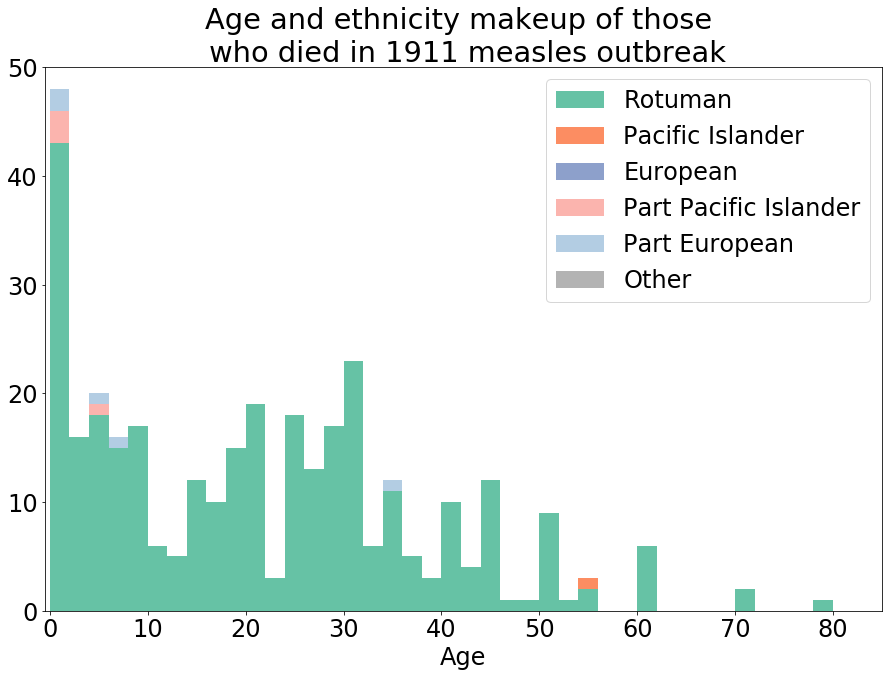

In [18]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 24})
plt.hist([age_meas_rot,age_meas_pacis,age_meas_euro,age_meas_partpacis,age_meas_parteuro,age_meas_other],color=[set2_colors[0],set2_colors[2],set2_colors[3],pastel_colors[0],pastel_colors[1],set2_colors[9]],bins=40,stacked=True,label=["Rotuman","Pacific Islander","European","Part Pacific Islander","Part European","Other"])
#plt.hist(age_meas_rot,bins=40)

plt.ylim((0,50))
plt.xlim((-0.5,85))
plt.legend()
plt.xlabel("Age")
plt.title("Age and ethnicity makeup of those \n who died in 1911 measles outbreak")
plt.show()

In [19]:
measles_hist,a,b=plt.hist([age_meas_rot,age_meas_pacis,age_meas_euro,age_meas_partpacis,age_meas_parteuro,age_meas_other],bins=40)
#plt.hist([age_meas_rot,age_meas_pacis,age_meas_nonpacis,age_meas_other],color=[set2_colors[0],set2_colors[2],set2_colors[7],set2_colors[9]],bins=40,stacked=True,label=["Pure Rotuman","Part Pacific Islander","Part Asian/European","Other"])

In [20]:
measles_hist

[array([ 43.,  16.,  18.,  15.,  17.,   6.,   5.,  12.,  10.,  15.,  19.,
          3.,  18.,  13.,  17.,  23.,   6.,  11.,   5.,   3.,  10.,   4.,
         12.,   1.,   1.,   9.,   1.,   2.,   0.,   0.,   6.,   0.,   0.,
          0.,   0.,   2.,   0.,   0.,   0.,   1.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 3.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 2.,  0.,  1.,  1.,  0.,  0.,  0.,  0., 

In [32]:
nonrotmeas=sum(measles_hist[1:6])

In [84]:
sum(nonrotmeas[5:40])

2.0

In [67]:
nonrotmeas[]

array([ 5.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [112]:
nonrotmeas[1:10]

array([ 0.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

48.0

In [164]:
#a1=measles_hist[0][0]
#a1=sum(measles_hist[0][1:5])
a1=sum(measles_hist[0][5:40])

#b1=nonrotmeas[0]
#b1=sum(nonrotmeas[1:5])
b1=sum(nonrotmeas[5:40])
res=np.array([a1,b1])

#c1=hist1911[0][0]-a1
#c1=sum(hist1911[0][1:5])-a1
c1=sum(hist1911[0][5:40])-a1

#d1=nonrot1911[0]-b1
#d1=sum(nonrot1911[1:5])-b1
d1=sum(nonrot1911[5:40])-b1

c=sum(res)*(1/(c1+d1))*c1
d=sum(res)*(1/(c1+d1))*d1
f_exp=np.array([c,d])

In [165]:
print(c1)
print(d1)
print(c1/(c1+d1))

1465.0
146.0
0.909373060211


In [166]:
chisquare(res,f_exp)

Power_divergenceResult(statistic=17.450970211011175, pvalue=2.9481378392350501e-05)

In [153]:
(sum(measles_hist[0][5:40])+sum(nonrotmeas[5:40]))/(0.8*(sum(hist1911[0][5:40])+sum(nonrot1911[5:40])))

0.14838621444201311

In [149]:
sum(nonrotmeas[5:40])/sum(nonrot1911[5:40])

0.013513513513513514

In [145]:
sum(nonrot1911[1:5])

83.0

In [95]:
sum(measles_hist[0][1:40])/(sum(measles_hist[0][1:40])+sum(nonrotmeas[1:40]))

0.9825174825174825

In [123]:
sum(measles_hist[0][1:3])

34.0

In [47]:
hist1911[0]

array([ 215.,  118.,  123.,  113.,  102.,   95.,   94.,   87.,  129.,
         92.,   78.,   67.,   69.,   73.,   96.,   87.,  133.,   53.,
         72.,   40.,   48.,   40.,   30.,   46.,   56.,   25.,   12.,
         28.,   24.,   19.,   29.,   15.,   26.,    4.,    4.,    5.,
          1.,    1.,    1.,    1.])

In [47]:
res=[43,3,2]
f_exp

array([ 41.11553785,   4.01593625,   2.8685259 ])

In [43]:
measles_hist[0][0]

43.0

In [44]:
measles_hist[1][0]

46.0

In [45]:
hist,a,b=plt.hist([age_dist_rot,age_dist_pacis,age_dist_euro,age_dist_partpacis,age_dist_parteuro,age_dist_other],bins=40,stacked=True)
#plt.hist([age_dist_rot,age_dist_pacis,age_dist_nonpacis,age_dist_other],color=[set2_colors[0],set2_colors[2],set2_colors[7],set2_colors[9]],bins=40,stacked=True,label=["Pure Rotuman","Part Pacific Islander","Part Asian/European","Other"])


In [46]:
hist

[array([ 215.,  118.,  123.,  113.,  102.,   95.,   94.,   87.,  129.,
          92.,   78.,   67.,   69.,   73.,   96.,   87.,  133.,   53.,
          72.,   40.,   48.,   40.,   30.,   46.,   56.,   25.,   12.,
          28.,   24.,   19.,   29.,   15.,   26.,    4.,    4.,    5.,
           1.,    1.,    1.,    1.]),
 array([ 215.,  121.,  126.,  114.,  106.,   97.,   95.,   91.,  136.,
          93.,   82.,   71.,   74.,   79.,  100.,   89.,  137.,   56.,
          76.,   43.,   49.,   41.,   31.,   46.,   57.,   26.,   12.,
          31.,   25.,   19.,   29.,   15.,   26.,    4.,    4.,    5.,
           1.,    1.,    1.,    1.]),
 array([ 215.,  121.,  128.,  114.,  106.,   97.,   95.,   92.,  137.,
          95.,   82.,   72.,   75.,   80.,  101.,   89.,  138.,   56.,
          77.,   43.,   49.,   42.,   31.,   47.,   58.,   27.,   12.,
          32.,   25.,   19.,   29.,   15.,   26.,    4.,    4.,    5.,
           1.,    1.,    1.,    1.]),
 array([ 236.,  131.,  139.,  123.

In [64]:
measles_u2=np.array([measles_hist[0][0],measles_hist[1][0]-measles_hist[0][0],measles_hist[2][0]-measles_hist[1][0],measles_hist[3][0]-measles_hist[2][0]])

In [62]:
hist_u2=np.array([hist[0][0],hist[1][0]-hist[0][0],hist[2][0]-hist[1][0],hist[3][0]-hist[2][0]])

In [63]:
hist_u2=(48/251)*hist_u2

In [60]:
sum(hist_u2)

251.0

In [67]:
measles_u2

array([ 43.,   3.,   2.,   0.])

In [66]:
hist_u2

array([ 41.11553785,   4.01593625,   2.8685259 ,   0.        ])

In [46]:
measles_hist

[array([ 43.,  16.,  18.,  15.,  17.,   6.,   5.,  12.,  10.,  15.,  19.,
          3.,  18.,  13.,  17.,  23.,   6.,  11.,   5.,   3.,  10.,   4.,
         12.,   1.,   1.,   9.,   1.,   2.,   0.,   0.,   6.,   0.,   0.,
          0.,   0.,   2.,   0.,   0.,   0.,   1.]),
 array([ 46.,  16.,  19.,  15.,  17.,   6.,   5.,  12.,  10.,  15.,  19.,
          3.,  18.,  13.,  17.,  23.,   6.,  11.,   5.,   3.,  10.,   4.,
         12.,   1.,   1.,   9.,   1.,   3.,   0.,   0.,   6.,   0.,   0.,
          0.,   0.,   2.,   0.,   0.,   0.,   1.]),
 array([ 48.,  16.,  20.,  16.,  17.,   6.,   5.,  12.,  10.,  15.,  19.,
          3.,  18.,  13.,  17.,  23.,   6.,  12.,   5.,   3.,  10.,   4.,
         12.,   1.,   1.,   9.,   1.,   3.,   0.,   0.,   6.,   0.,   0.,
          0.,   0.,   2.,   0.,   0.,   0.,   1.]),
 array([ 48.,  16.,  20.,  16.,  17.,   6.,   5.,  12.,  10.,  15.,  19.,
          3.,  18.,  13.,  17.,  23.,   6.,  12.,   5.,   3.,  10.,   4.,
         12.,   1.,   1.,   9.

In [72]:
chisquare(measles_u2[0:3],f_exp=hist_u2[0:3])

Power_divergenceResult(statistic=0.60634920634920653, pvalue=0.73847014588140714)

In [71]:
hist_u2[0:3]

array([ 41.11553785,   4.01593625,   2.8685259 ])

In [48]:
chisquare(res,f_exp)

Power_divergenceResult(statistic=0.60634920634920653, pvalue=0.73847014588140714)